## Week 8 Assignment Solved By Hemant
-> Date = 23 July 2024

In [357]:
# lets import the library first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [358]:
# lets load the data set now 
train_data = pd.read_csv('Training Dataset.csv')
test_data = pd.read_csv('Test Dataset.csv')
sample_submission = pd.read_csv('Sample_Submission.csv')

In [359]:
# check the data
train_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [360]:
# lets check the missing values in the training data
train_data.isnull().sum()



Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

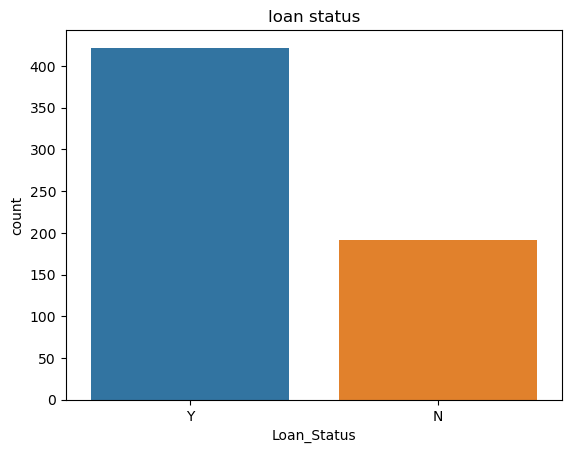

In [361]:
# lets plot some values 
sns.countplot(x='Loan_Status', data=train_data)
plt.title('loan status')
plt.show()


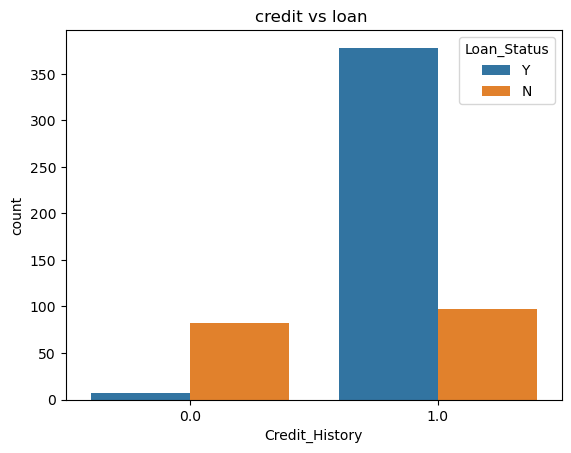

In [362]:

sns.countplot(x='Credit_History', hue='Loan_Status', data=train_data)
plt.title('credit vs loan ')
plt.show()

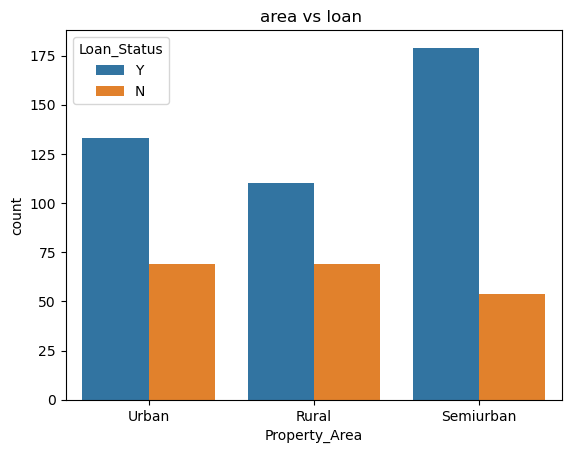

In [363]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_data)
plt.title('area vs loan ')
plt.show()


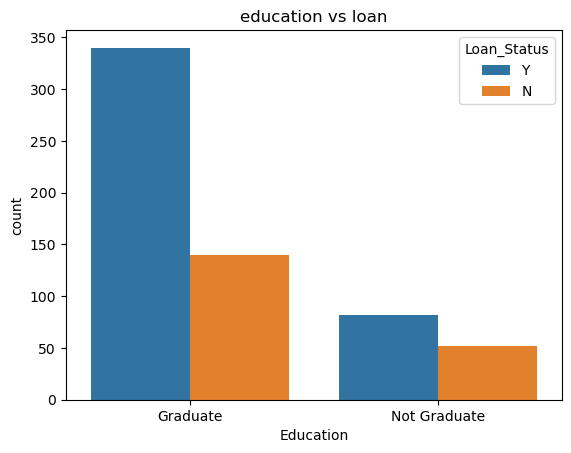

In [364]:
sns.countplot(x='Education', hue='Loan_Status', data=train_data)
plt.title('education vs loan')
plt.show()

In [365]:
# now lets clear the missing values
num_imputer = SimpleImputer(strategy='median')
train_data['LoanAmount'] = num_imputer.fit_transform(train_data[['LoanAmount']])
test_data['LoanAmount'] = num_imputer.transform(test_data[['LoanAmount']])


In [366]:
cat_imputer = SimpleImputer(strategy='most_frequent')
train_data['Gender'] = cat_imputer.fit_transform(train_data[['Gender']])
test_data['Gender'] = cat_imputer.transform(test_data[['Gender']])

In [367]:
train_data['Married'] = cat_imputer.fit_transform(train_data[['Married']])
test_data['Married'] = cat_imputer.transform(test_data[['Married']])

In [368]:
train_data['Dependents'] = cat_imputer.fit_transform(train_data[['Dependents']])
test_data['Dependents'] = cat_imputer.transform(test_data[['Dependents']])

In [369]:
train_data['Self_Employed'] = cat_imputer.fit_transform(train_data[['Self_Employed']])
test_data['Self_Employed'] = cat_imputer.transform(test_data[['Self_Employed']])

In [370]:
train_data['Credit_History'] = cat_imputer.fit_transform(train_data[['Credit_History']])
test_data['Credit_History'] = cat_imputer.transform(test_data[['Credit_History']])

In [371]:
# now label encoding karte hia 
le = LabelEncoder()
train_data['Gender'] = le.fit_transform(train_data['Gender'])
test_data['Gender'] = le.transform(test_data['Gender'])


In [372]:
train_data['Married'] = le.fit_transform(train_data['Married'])
test_data['Married'] = le.transform(test_data['Married'])


In [373]:
train_data['Education'] = le.fit_transform(train_data['Education'])
test_data['Education'] = le.transform(test_data['Education'])

In [374]:
train_data['Self_Employed'] = le.fit_transform(train_data['Self_Employed'])
test_data['Self_Employed'] = le.transform(test_data['Self_Employed'])

In [375]:

train_data['Property_Area'] = le.fit_transform(train_data['Property_Area'])
test_data['Property_Area'] = le.transform(test_data['Property_Area'])

In [376]:
train_data['Loan_Status'] = le.fit_transform(train_data['Loan_Status'])

In [377]:
train_data['Dependents'] = train_data['Dependents'].replace('3+', 3).astype(int)
test_data['Dependents'] = test_data['Dependents'].replace('3+', 3).astype(int)

In [378]:
# aab test and train me divide karte hai 
X = train_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_data['Loan_Status']

In [379]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=52)


In [380]:
# model banate hia i choosed random forest 
model = RandomForestClassifier(random_state=42)

In [381]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [382]:
val_predictions = model.predict(X_val)

In [383]:
# accurayc check akrte hai 
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 0.79


In [384]:
print(classification_report(y_val, val_predictions))


              precision    recall  f1-score   support

           0       0.76      0.49      0.59        39
           1       0.80      0.93      0.86        84

    accuracy                           0.79       123
   macro avg       0.78      0.71      0.73       123
weighted avg       0.78      0.79      0.77       123



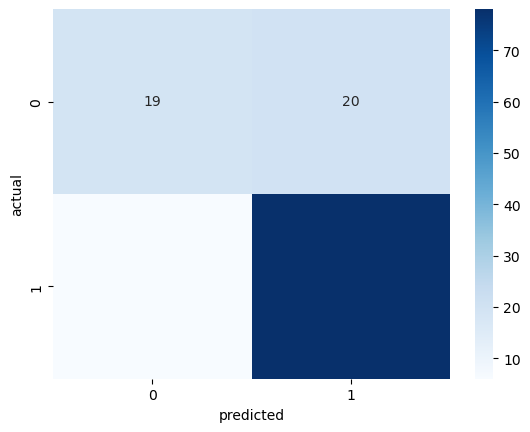

In [385]:
# confusion matrix
conf_matrix = confusion_matrix(y_val, val_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [386]:
# test karte hai 
X_test = test_data.drop('Loan_ID', axis=1)

test_predictions = model.predict(X_test)

submission = pd.DataFrame({'Loan_ID': test_data['Loan_ID'], 'Loan_Status': test_predictions})

submission['Loan_Status'] = submission['Loan_Status'].apply(lambda x: 'Y' if x == 1 else 'N')

submission.head()


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


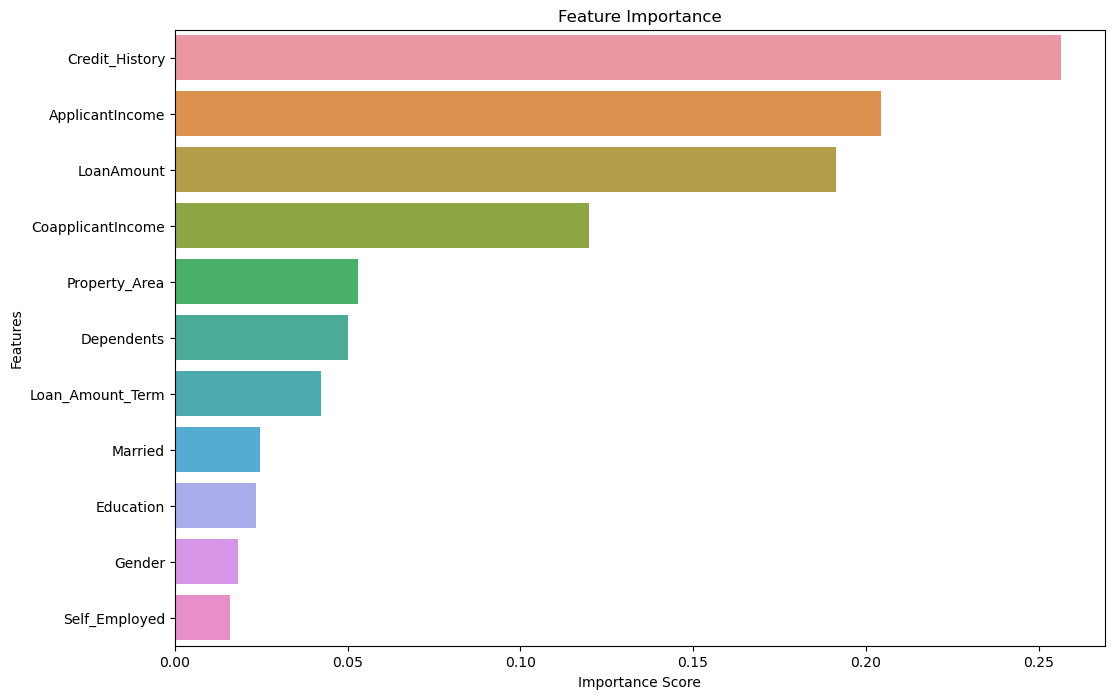

In [387]:
# Visualize feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


# Solved By Hemant
-> Date = 23 July 2024